# Procesamiento de Lenguaje Natural

Se utilizó el tokenizador de tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer

In [3]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

2025-03-13 19:40:54.189394: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 19:40:54.368566: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 19:40:54.368655: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 19:40:54.382762: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 19:40:54.416745: I tensorflow/core/platform/cpu_feature_guar

In [44]:
from wordcloud import WordCloud

In [49]:
import plotly.graph_objects as go
import networkx as nx

In [52]:
from collections import defaultdict

In [4]:
STOPWORDS = set(stopwords.words('english'))

In [5]:
path = "./dataset/"
df = pd.read_csv(path + "df_completo.csv")

## Longitud del Texto

In [6]:
longitud_texto = df["text"].apply(lambda x: len(x.split()))
MAX_LONGITUD = int(np.percentile(longitud_texto, 95))
print(f"Longitud óptima: {MAX_LONGITUD}")

Longitud óptima: 904


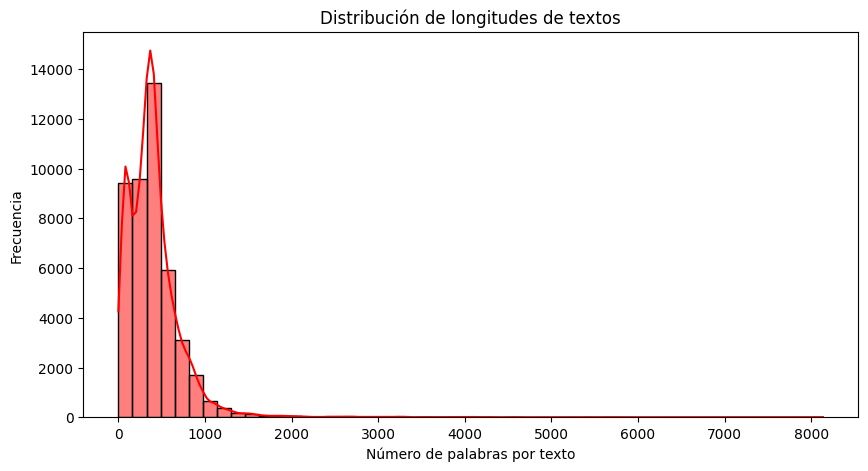

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(longitud_texto, kde=True, bins=50, color="red")
plt.xlabel("Número de palabras por texto")
plt.ylabel("Frecuencia")
plt.title("Distribución de longitudes de textos")
plt.show()

## Limpieza del Texto

In [8]:
texto = " ".join(df['text']).lower()

In [19]:
# texto_filtrado = " ".join(p for p in texto.split() if p not in STOPWORDS)
texto_filtrado = " ".join(p for p in texto.split() if p.isalpha() and p not in STOPWORDS)

In [20]:
print(texto_filtrado[:500])

donald trump wish americans happy new year leave give shout haters dishonest fake news former reality show star one job country rapidly grows stronger want wish even dishonest fake news happy healthy new president angry pants great year country rapidly grows stronger want wish even dishonest fake news happy healthy new great year donald trump december tweet went welll kind president sends new year greeting like infantile lack decency even allow rise gutter long enough wish american citizens happ


In [21]:
tokens = text_to_word_sequence(texto_filtrado)

In [22]:
lemmatizer = WordNetLemmatizer()

In [23]:
texto_lematizado = [lemmatizer.lemmatize(p) for p in tokens]

In [24]:
print(texto_lematizado[:200])

['donald', 'trump', 'wish', 'american', 'happy', 'new', 'year', 'leave', 'give', 'shout', 'hater', 'dishonest', 'fake', 'news', 'former', 'reality', 'show', 'star', 'one', 'job', 'country', 'rapidly', 'grows', 'stronger', 'want', 'wish', 'even', 'dishonest', 'fake', 'news', 'happy', 'healthy', 'new', 'president', 'angry', 'pant', 'great', 'year', 'country', 'rapidly', 'grows', 'stronger', 'want', 'wish', 'even', 'dishonest', 'fake', 'news', 'happy', 'healthy', 'new', 'great', 'year', 'donald', 'trump', 'december', 'tweet', 'went', 'welll', 'kind', 'president', 'sends', 'new', 'year', 'greeting', 'like', 'infantile', 'lack', 'decency', 'even', 'allow', 'rise', 'gutter', 'long', 'enough', 'wish', 'american', 'citizen', 'happy', 'new', 'bishop', 'talbert', 'swan', 'december', 'one', 'like', 'calvin', 'december', 'impeachment', 'would', 'make', 'great', 'year', 'also', 'accept', 'regaining', 'control', 'miranda', 'yaver', 'december', 'hear', 'include', 'many', 'people', 'hate', 'hate', 'al

## Frecuencia de Palabras

In [25]:
freq_dist = FreqDist(texto_lematizado)

In [40]:
n = 10 # palabras más frecuentes
palabras_comunes = freq_dist.most_common(n)

In [41]:
df_freq = pd.DataFrame(palabras_comunes, columns=['Palabra', 'Frecuencia'])

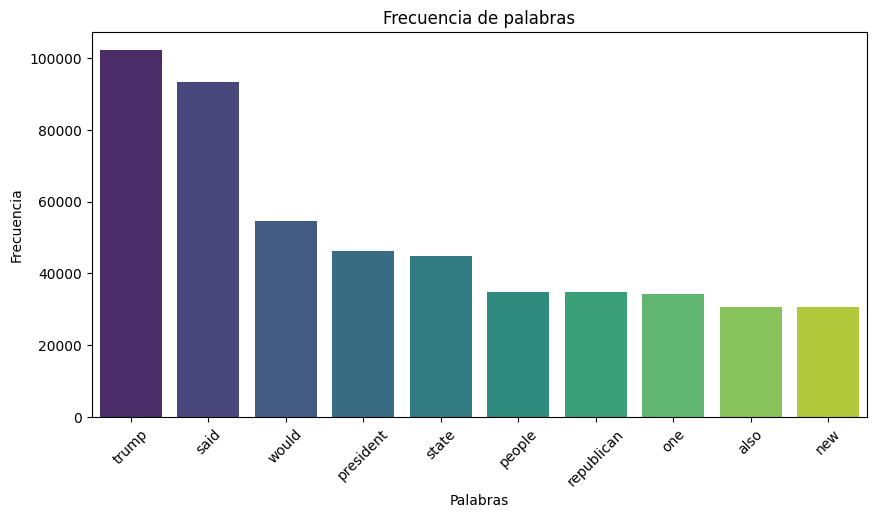

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x='Palabra', y='Frecuencia', data=df_freq, palette='viridis', hue='Palabra')
plt.xlabel("Palabras")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de palabras")
plt.xticks(rotation=45)
plt.show()

## Word Cloud

In [45]:
word_cloud = WordCloud(background_color='white', colormap='viridis', height=800, width=1200).generate(' '.join(texto_lematizado))

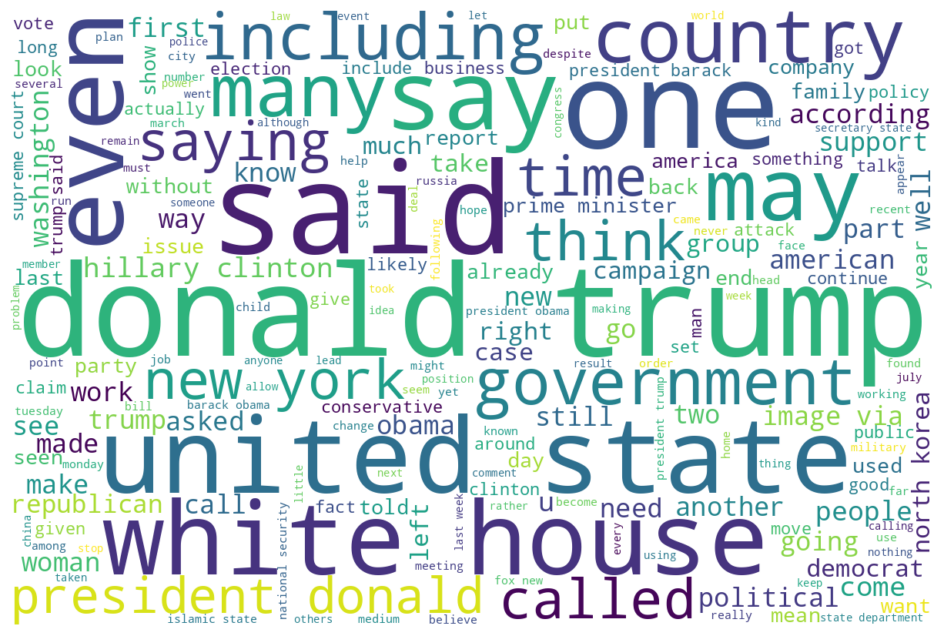

In [48]:
plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Gráfica

In [175]:
n = 15 # palabras más frecuentes
comunes = freq_dist.most_common(n)
palabras_grafica = set(p for p, _ in comunes)
max_frecuencia = max(frecuencia for _, frecuencia in comunes)

In [176]:
ventana = 2
co_ocurrencia = defaultdict(int)

In [178]:
for i, palabra in enumerate(texto_lematizado):
    if palabra in palabras_grafica:
        ini = max(0, i - ventana)
        fin = min(len(texto_lematizado), i + ventana + 1)
        for j in range(ini, fin):
            if i != j and texto_lematizado[j] in palabras_grafica:
                co_ocurrencia[(palabra, texto_lematizado[j])] += 1

In [179]:
G = nx.Graph()
for (palabra1, palabra2), peso in co_ocurrencia.items():
    G.add_edge(palabra1, palabra2, weight=peso)

In [192]:
pos = nx.spring_layout(G, seed=42)
nx.set_node_attributes(G, pos, 'pos')

In [193]:
# Aristas
edge_x, edge_y = [], []

for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    
edge_trace = go.Scatter(
    x = edge_x, y = edge_y,
    line = dict(width=1, color='black'),
    mode = 'lines'
)

In [194]:
# Nodos
node_x = []
node_y = []
node_text = []
node_sizes = []

for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)
    conexiones = len(list(G.neighbors(node)))
    node_text.append(f'{node}: {conexiones} conexiones')
    frecuencia = dict(comunes).get(node, 1)
    frecuencia = (frecuencia / max_frecuencia) * 100
    node_sizes.append(frecuencia)
    
    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition='top center',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='Viridis',
            # reversescale=True, 
            color=node_sizes,
            size=node_sizes,
            colorbar=dict(
                thickness=20,
                title='Frecuencia',
                xanchor='left',
                titleside='right'
            ),
            line_width=1
        )
    )

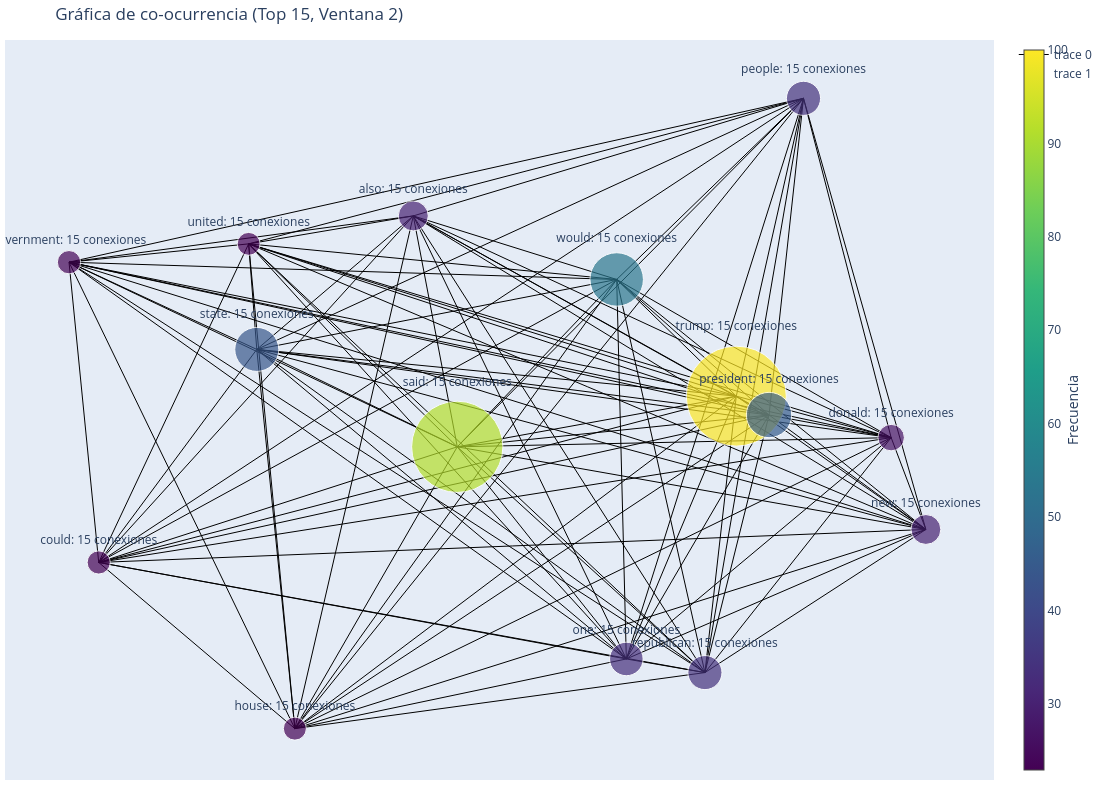

In [195]:
fig = go.Figure(
    data = [edge_trace, node_trace],
    layout = go.Layout(
                title = f'Gráfica de co-ocurrencia (Top {n}, Ventana {ventana})',
                margin = dict(b=20, l=5, r=5, t=40),
                xaxis = dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis = dict(showgrid=False, zeroline=False, showticklabels=False),
                width = 1000,  
                height = 800 
            )
)
fig.show()